In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
titanic = pd.read_csv('/kaggle/input/titanic/train_and_test2.csv')

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv


In [4]:
print(titanic.head())
print(titanic.info())
print(titanic.describe())

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [5]:
titanic.loc[:, 'Sex']
titanic1 = titanic.loc[:, 'Sex']
titanic1.mean()

0.3559969442322384

In [6]:
titanic2 = titanic.loc[:, 'Fare']
titanic2.median()

14.4542

In [7]:
titanic['category'] = titanic['Fare'].apply(lambda x: 'upper' if x > 14.4542 else 'lower')

In [8]:
print(titanic.head())

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  zero.17  \
0       0  ...        0        0       3        0        0       2.0        0   
1       0  ...        0        0       1        0        0       0.0        0   
2       0  ...        0        0       3        0        0       2.0        0   
3       0  ...        0        0       1        0        0       2.0        0   
4       0  ...        0        0       3        0        0       2.0        0   

   zero.18  2urvived  category  
0        0         0     lowe

In [9]:
grouped = titanic.groupby(['Sex', 'category']).size().unstack()
proportions = grouped.div(grouped.sum(axis=1), axis=0)
print("Proportions between 'upper' values and sex")
print(proportions)

Proportions between 'upper' values and sex
category     lower     upper
Sex                         
0         0.583630  0.416370
1         0.356223  0.643777


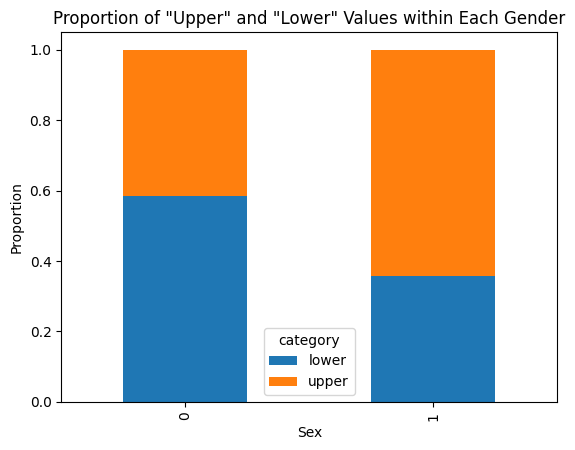

In [10]:
proportions.plot(kind='bar', stacked=True)
plt.ylabel('Proportion')
plt.title('Proportion of "Upper" and "Lower" Values within Each Gender')
plt.show()